# Исследовательский анализ продаж видеоигр

## Описание проекта

В нашем распоряжении датафрейм с данными из интернет-магазина «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

**Цель исследования**

1. Определить для пользователя каждого региона (NA, EU, JP):
    * Самые популярные платформы (топ-5). Опишите различия в долях продаж.
    * Самые популярные жанры (топ-5). Поясните разницу.
    * Влияет ли рейтинг ESRB на продажи в отдельном регионе?
2. Проверить гипотезы:
    * Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
    * Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

**Ход исследования**

Данные мы получим по пути '/Desktop/Analytics/games.csv' или по ссылке https://code.s3.yandex.net/datasets/games.csv . Так как о данных ничего неизвестно, мы проверим их на качество, поменяем названия столбцов как требует этика кода, преобразуем типы данных, где это нужно, уберем пропуски или оставим их, обясняя почему мы это делаем, и в конце добавим новый столбец в котором будет суммарные продажи во всех регионах. 

Далее мы приступим к исследовательскому анализу данных:
* Посмотрим, сколько игр выпускалось в разные годы. Поймем, важны ли данные за все периоды.
* Посмотрите, как менялись продажи по платформам. Узнаем, за какой характерный срок появляются новые и исчезают старые платформы. 
* Возьмем данные за соответствующий актуальный период. Актуальный период определим самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
* Определим, какие платформы лидируют по продажам, растут или падают. Выберим несколько потенциально прибыльных платформ.
* Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишим результат.
* Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. Сформулируем выводы.
* Соотнесем выводы с продажами игр на других платформах.
* Посмотрим на общее распределение игр по жанрам. Поймем, что можно сказать о самых прибыльных жанрах? А также, выделяются ли жанры с высокими и низкими продажами?

Составим портрет для каждого пользователя\
Напишем общий вывод

**Описание данных**

Name — название игры\
Platform — платформа\
Year_of_Release — год выпуска\
Genre — жанр игры\
NA_sales — продажи в Северной Америке (миллионы проданных копий)\
EU_sales — продажи в Европе (миллионы проданных копий)\
JP_sales — продажи в Японии (миллионы проданных копий)\
Other_sales — продажи в других странах (миллионы проданных копий)\
Critic_Score — оценка критиков (максимум 100)\
User_Score — оценка пользователей (максимум 10)\
Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

## Исследование общей информации

In [1]:
#Подключим нужные библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st

In [2]:
#Откроем датафрейм
try:
    df = pd.read_csv('https://link_to_the_dataset/datasets/games.csv')
except:
    df = pd.read_csv('/Desktop/Analytics/games.csv')

**Посмотрим на датафрейм**

In [3]:
df.head(20)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


**Информция о датафрейме**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


## Предобработка данных

**Поменяем названия столбцов**

In [5]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

Можем заменить, что все названия столбцов не соответствуют стандрату, приведем их к нижнему регистру.

In [6]:
df.columns = ['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating']

In [7]:
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Замена была произведена успешна.

**Замена типов данных**

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [9]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Поменяем тип данных для столбца user_score, сейчас там тип данных object, туда больше подойдет тип данных float, для этого значения tbd нам придется заменить на NaN.

In [10]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [11]:
df['user_score']= df['user_score'].replace('tbd', np.NaN)

In [12]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

In [13]:
df['user_score'] = df['user_score'].astype('float')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


Больше не осталось типов данных, которые бы не подходили по типу данных. Больше ничего не надо менять.

**Проверим на дубликаты**

In [15]:
df.duplicated().sum()

0

**Выброс**

In [16]:
df[(df['platform'] == 'DS') & (df['year_of_release'] == 1985)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
15957,Strongest Tokyo University Shogi DS,DS,1985.0,Action,0.0,0.0,0.02,0.0,NaN,NaN,NaN


Мы нашли выброс, который влияет на дальнейший анализ. Платформа DS не существовала в 1985 году, она начала свое сущестование в 2004 году. Удалим этот выброс.

In [17]:
df = df.drop(index = 15957)

In [18]:
df[(df['platform'] == 'DS') & (df['year_of_release'] == 1985)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


Выброс был успешно удален.

Явных дубликатов нету.

**Заполним пропуски**

Посмотрим, где мы сможем заполнить пропуски, а где оставим.

In [19]:
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8577
user_score         9124
rating             6765
dtype: int64

Мы видим пропуски в столбцах: name, year_of_release, genre, critic_score, user_score, rating.

В колонках critic_score, user_score мы ничем не можем заполнить пропуски, так как не знаем какую оценку поставили критики, пользователи. Возможно пропуски образовались из-за этого, что оценок было слишком мало, чтобы высвечивалась средня оценка.

В колонке rating, мы не знаем к какой категории принадлежить игра. Из-за этого тоже не можем заполнить. Пропуски в rating появились скорее всего из-за этой же проблемы, что и в других колонках, игра была недостаточно популярная и не удостоилась внимания, чтобы ставить ей рейтинг.

В колонке year_of_release пропуск мог образоваться из-за незнания точной даты выхода, или полуения данных из другого источника.

**Пропуски в rating**

Заменим пропуски в колонке rating на значение "undefined", это значение больше подходит для этого типа данных.

In [20]:
df['rating'] = df['rating'].fillna('undefined')

**Пропуски в name и genre**

Также удалим пару строк с пропусками в колонках name и genre, там всего два пропуска.

In [21]:
df[df['name'].isnull() == True]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,undefined
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,undefined


Можем увидеть, что эти две строки с пропущенными значениями в столбцах: name, genre, critic_score, user_score. Поэтому удалим их.

In [22]:
df = df.dropna(subset=['name'])

**Пропуски в year_of_release**

Также можем увидеть, что есть пропуски в столбце year_of_release.

In [23]:
df[df['year_of_release'].isnull() == True]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,undefined
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,undefined
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,NaN,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,undefined


Можем увидеть, что пропуски встречаются не только в колонке year_of_release, а также в колонках: critic_score, user_score и rating.\
Данные пропуски составляют примерно 1,61%. Удалим их, тогда дальнейшний наш анализ будет более точным.

In [24]:
df = df.dropna(subset=['year_of_release'])

In [25]:
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8460
user_score         8980
rating                0
dtype: int64

Также до этого, в столбце user_score было значение "tbd", определяется оно как TBD = to be determined. Примечание: ПО - Подлежит определению. Скорее всего оно образовалось из-за нехватки оценок, поэтому заменили его на nan.

**Добавим столбец с общей суммой продаж**

Также было задано добавить новый столбец с суммой продаж во всех регионах, сделаем это.

In [26]:
df['sum_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

In [27]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,undefined,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,undefined,31.38


Как мы видим, все успешно получилось.

**Вывод**

На этом шаге мы сделали:
* Заменили названия столбцов, где это нужно было
* Заменили типы данных, где могли
* Проверили дубликаты
* Объяснили почему не можем оставить пропуски, а где-то убрали их
* Добавили новый столбец

## Исследовательский анализ

### Построим зависимость количество игр от года

In [29]:
df['year_of_release'].describe()

count    16443.000000
mean      2006.487563
std          5.873314
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: year_of_release, dtype: float64

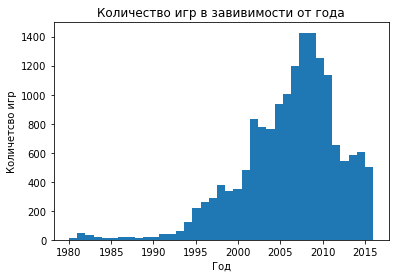

In [30]:
df['year_of_release'].plot(kind='hist',bins = 37)
plt.title('Количество игр в завивимости от года')
plt.ylabel('Количетсво игр')
plt.xlabel('Год')
plt.show();

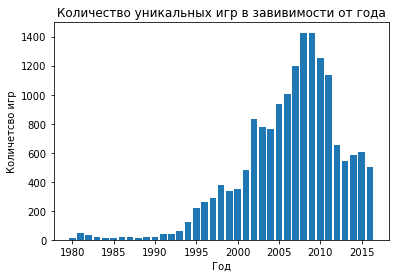

In [31]:
year_of_release_hist = df.pivot_table(index='year_of_release', values='name',aggfunc='count')
plt.bar(year_of_release_hist.index, year_of_release_hist['name'])
plt.title('Количество уникальных игр в завивимости от года')
plt.ylabel('Количетсво игр')
plt.xlabel('Год')
plt.show();

Выше, мы можем увидеть два графика, первый показывает количество выпущенных игр за один год, второй график показывает количество выпущенных уникальных игр.\
Можно заметить, что графики визуально похожи, возможно игры выпущенные для других платформ были не в большом объеме.

Ответим на вопрос: Важны ли данные за все периоды?\
Нет, можно отбросить часть графика с 1980 по 1994 года, так как игр практически не выпускалось, относительно будущих лет. Было всего примерно 100 игр в год.\
Также виден взлет начиная с 2001 года, новая эпоха игр, тогда выпускалось от 750 игр в год.\
Дальше с 2011 года, мы видим провал, количество игр упало до примерного уровня 500-600 игр в год.

### Суммарные продажи платформ в зависимости от годов

In [32]:
df['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

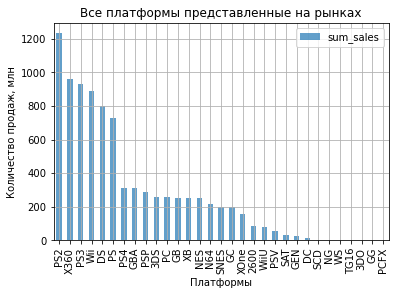

In [33]:
(df.pivot_table(index='platform', values='sum_sales',aggfunc='sum')
 .sort_values(by='sum_sales',ascending=False)
 .plot(kind='bar',
           grid=True,
           linewidth=5,
           alpha=0.7))
plt.title('Все платформы представленные на рынках')
plt.ylabel('Количество продаж, млн')
plt.xlabel('Платформы')
plt.show();

Видно, что больше всего продаж было на платформах: PS2, X360, Wii, PS3, DS, PS. Построим для этой шестерки зависимость продаж от года.

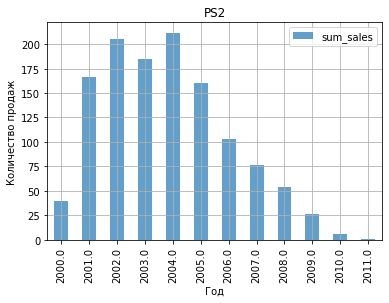

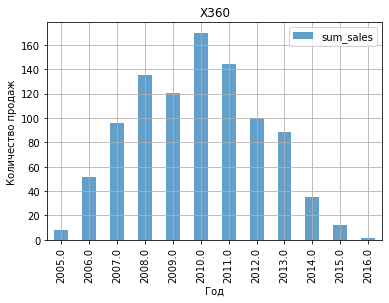

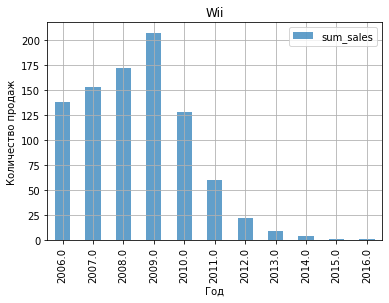

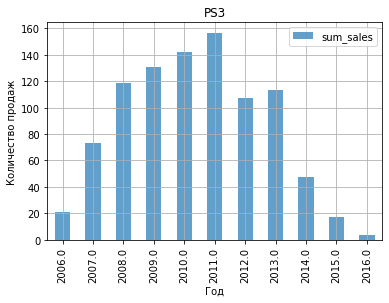

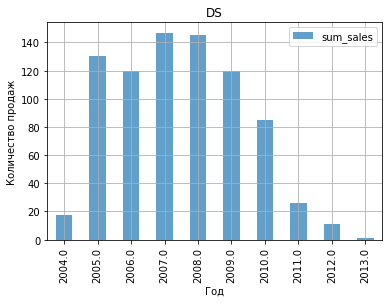

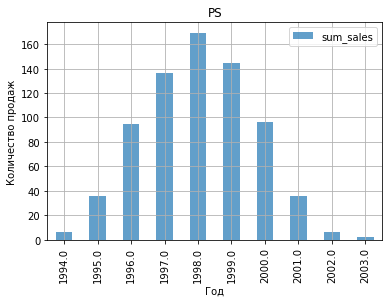

In [34]:
for platform in ['PS2','X360','Wii','PS3','DS','PS']:
    (df.loc[df['platform'] == platform]
     .pivot_table(index='year_of_release', values='sum_sales',aggfunc='sum')
     .plot(kind='bar',
           grid=True,
           linewidth=5,
           alpha=0.7)
    )
    plt.title(platform)
    plt.ylabel('Количество продаж')
    plt.xlabel('Год')

Для платформы PS2 мы видим, что продолжительность ее жизни составило 12 лет и то последний год можно не считать, там было очень мало продаж. Начала она свое существования в 2000 году и закончила в 2011 году. Также видно, что с 2000 по 2001 год был резкий скачок, видно, как набрала популярность, далее популярность была примерно 5 лет. Дальше видим плавный спад до 2011 года.

Для платформы X360 мы можем увидеть нормальное распределение, платформа начала свое существования в 2005 и закончила в 2016 году. Хит продаж пришелся с 2007 по 2013 год. 12 лет просуществовала платформа. 

Для платформы Wii мы видим сразу скачек, годы сущестования платформы составили с 2006 по 2016 год. Самая популярность была с 2006 по 2011 год. Дальше видим резкий спад и плавное затухание. Платформа просущестовала 11 лет.

Для платформы PS3 мы видим, что жизнь свою она начала в 2006 и закончила в 2016 году. Хит продаж был с 2008 по 2013 год. Дальше резкий спад, и за 3 года закончила свое сущестования. 11 лет просущестовала PS3

Для платформы DS мы видим, что продажи начались с 2004 и по 2013. Первый год был тухлым, далее взлет и удержания продаж на 6 лет. Дальше резкий спад и смерть за 3 года. 10 лет просущестовала платформа.

Для платформы PS мы можем увидеть начала сущестования в 1994 и по 2003 год. 10 лет существования платформы, начало индустрии PS. Видим нормальное распределение.

Посчитая, мы можем увидеть, что средний срок жизни платформы 11 лет, дальше она заканчивает свое сущестование.

### Актуальный период

Возьмем актуальный период с 2014-2016 год, так как этот период больше всего нам подходит, он достаточно свежий и ближе всего к 2017 году, относительно других периодов. Большинство платформ представленных в нем выпускают игры и три платформы занимает топ по продажам. Он хорошо нам подходит, поэтому построим для этого периода графики для платформ по продажам.

In [35]:
actually_period = df.query('2014 <= year_of_release & year_of_release <= 2016')

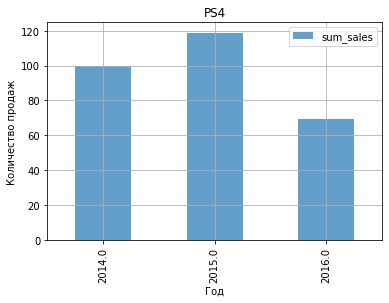

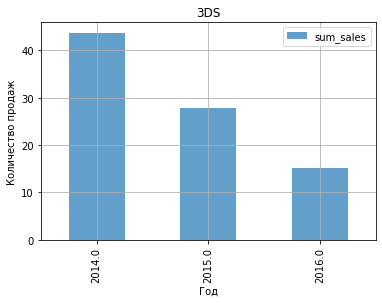

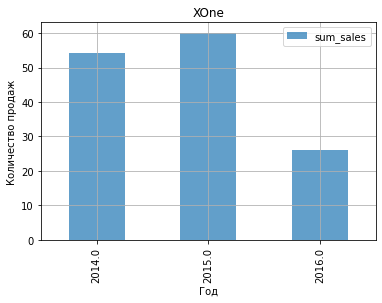

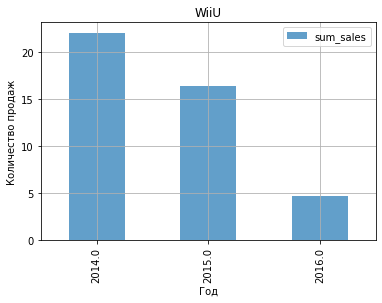

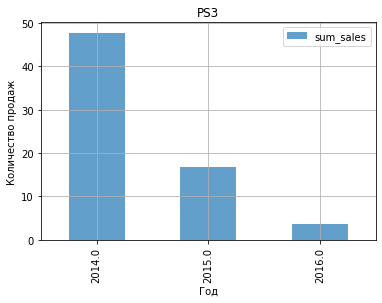

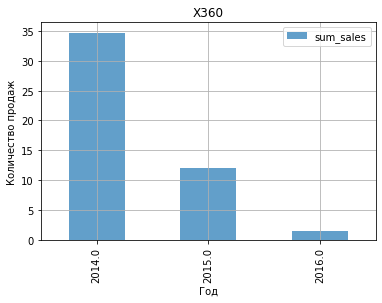

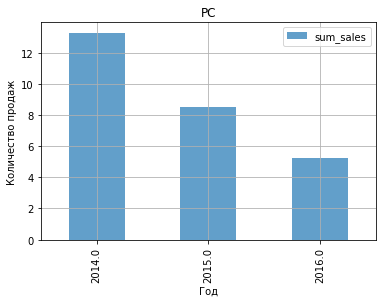

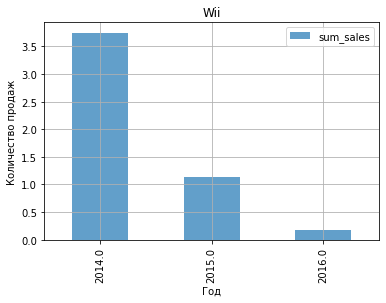

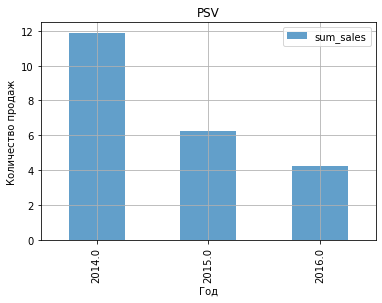

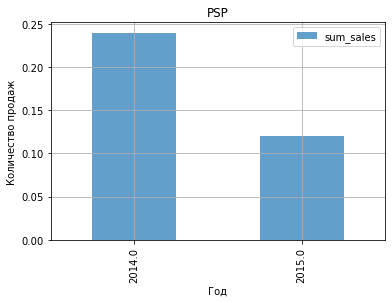

In [36]:
for platform in actually_period['platform'].unique():
    (actually_period.loc[(actually_period['platform'] == platform)]
     .pivot_table(index='year_of_release', values='sum_sales',aggfunc='sum')
     .plot(kind='bar',
           grid=True,
           linewidth=5,
           alpha=0.7)
    )
    plt.title(platform)
    plt.ylabel('Количество продаж')
    plt.xlabel('Год')

### Определим, какие платформы лидируют

In [37]:
actually_period['platform'].unique()

array(['PS4', '3DS', 'XOne', 'WiiU', 'PS3', 'X360', 'PC', 'Wii', 'PSV',
       'PSP'], dtype=object)

Сделаем сводную таблицу по платформам, годам и продажам.

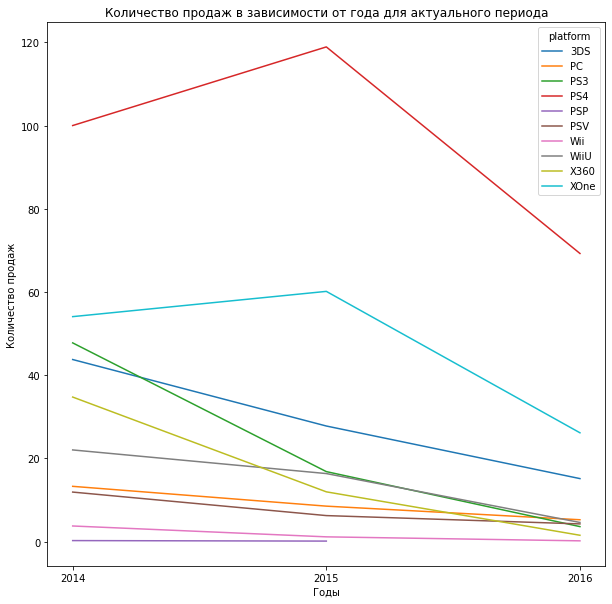

In [38]:
(actually_period
 .pivot_table(index='platform', columns=['year_of_release'],values='sum_sales',aggfunc='sum')
 .T
 .plot(kind='line',
      figsize=(10,10)))
plt.xticks(np.arange(actually_period['year_of_release'].min(), actually_period['year_of_release'].max()+1, step=1))
plt.xlabel('Годы')
plt.ylabel('Количество продаж')
plt.title('Количество продаж в зависимости от года для актуального периода')
plt.show();

На графике мы можем увидеть зависимость года и количество продаж.\
Виден на всех платформах спад к 2016 году.\
В топ 3 платформы по продажам входит: PS4, XOne, 3DS. Все остальные платформы находятся примерно на одинаковом уровне.\
Хуже всего себя чувствуют платформы: Wii, X360, PS3 к 2016 году.\
В 2015 году виден рост только у трех платформ из 10, это: PS4, XOne, PSV.


### Построим ящик с усами

Построим ящики с усами для всех платформ по суммарным продажам

In [39]:
df.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,sum_sales
count,16443.000000,16443.000000,16443.000000,16443.000000,16443.000000,7983.000000,7463.000000,16443.000000
mean,2006.487563,0.264028,0.145939,0.078491,0.047597,68.994363,7.126330,0.536055
std,5.873314,0.818400,0.506731,0.311109,0.188011,13.920060,1.499447,1.558828
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000,6.400000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000,7.500000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000,8.200000,0.470000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000,9.700000,82.540000


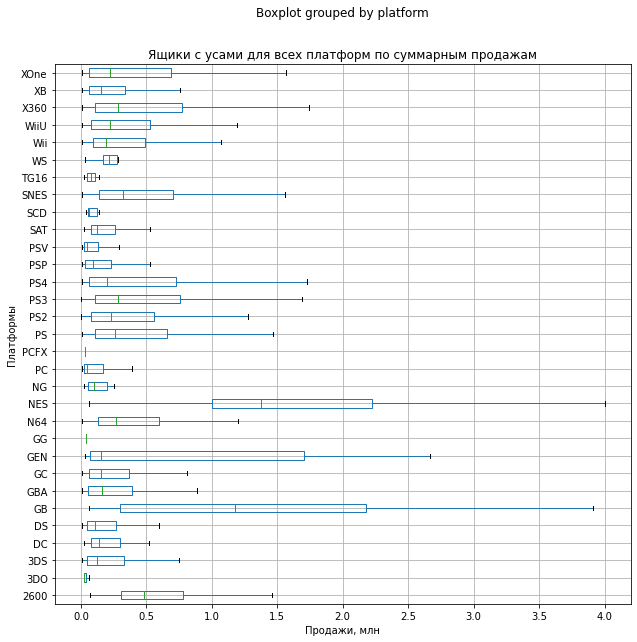

In [40]:
df.boxplot(by='platform', column='sum_sales', vert=False, figsize=(10,10), showfliers=False)
plt.title('Ящики с усами для всех платформ по суммарным продажам')
plt.xlabel('Продажи, млн')
plt.ylabel('Платформы')
plt.show;

Самый топ продаж находится у платформ: NES, GB, GEN. Они входят топ-3 платформы по продажам.\
Практически своего следа не оставили такие компании: 3DO, PCFX, GG. Их продажи были минимальны, относительно других платформ.\
Самые большие усы можно заметить у двух платформ: NES, GB.

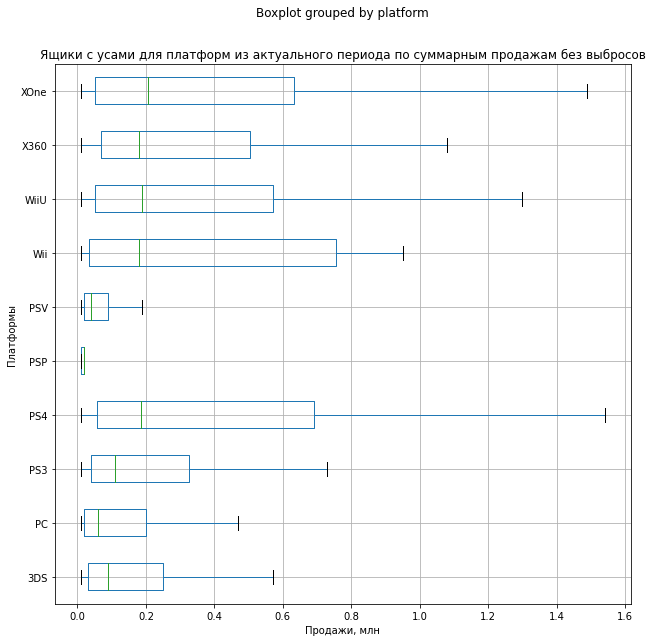

In [41]:
actually_period.boxplot(by='platform', column='sum_sales', vert=False, figsize=(10,10), showfliers=False)
plt.title('Ящики с усами для платформ из актуального периода по суммарным продажам без выбросов')
plt.xlabel('Продажи, млн')
plt.ylabel('Платформы')
plt.show;

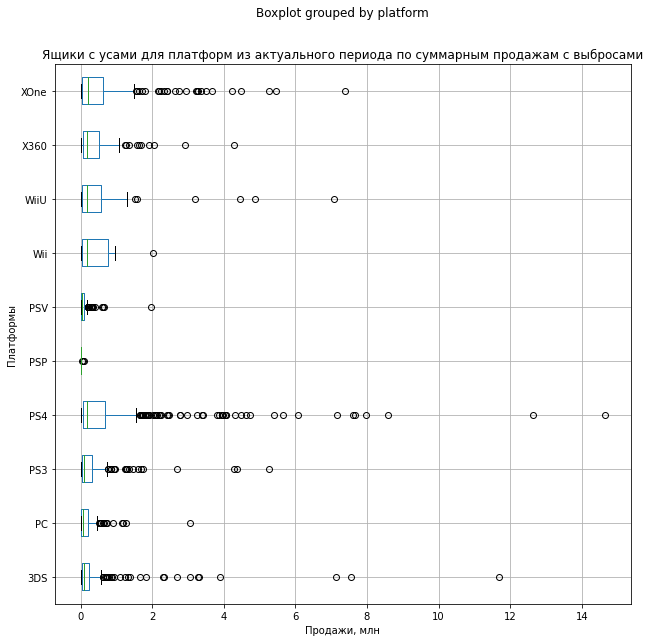

In [42]:
actually_period.boxplot(by='platform', column='sum_sales', vert=False, figsize=(10,10))
plt.title('Ящики с усами для платформ из актуального периода по суммарным продажам с выбросами')
plt.xlabel('Продажи, млн')
plt.ylabel('Платформы')
plt.show;

Опишем платформы, которые входят в актуальный период.\
Если рассмотреть все ящики с усами, то можно заметить, что меньше всего продаж в год у PSP. Скорее всего это связано с тем, что ее эпоха закончилась в 2015 году и с 2014 по 2015 уже была почти на нуле.\
У Wii самый большой ящик, от 0.05 и до чуть больше 0.7 млн продаж в год. Но при этом медиана не практически не отличается от других платформ, а именно: XOne, X360, WiiU, PS4. На второй диаграмме заметен выброс в 2 млн продаж.\
На второй диаграмме можем увидеть у PS4 2 выброса около 13 млн и 14,5 млн продаж. Это самые большие выбросы относительно других платформ.\
Если рассматривать платформы, в которые выгоднее всего вложить, по ящикам с усами, то лучше всего рассмотреть: XOne, Wii, PS4. Их медианы примерно совпадают, но при этом ящик у Wii больше всех.\
Если рассматривать в какие платформы точно не надо вкладываться, то это: PSP,PSV, PC. У них меньше всего продаж в год, относительно других платформ из актуального периода.


### Влияние отзывов на продажи внутри одной платформы

Чтобы понять, как влияют отзывы на продажи на одной платформе, возьмем платформу PS4 из актуального периода. Она занимает лидирующее место среди платформ за период 2014-2016 год.

In [43]:
actually_period.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,undefined,14.63
42,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014.0,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,undefined,11.68
77,FIFA 16,PS4,2015.0,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015.0,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,undefined,7.98


In [44]:
actually_period.query('platform == "PS4"')['sum_sales'].corr(df['critic_score'])

0.4026614106810408

In [45]:
actually_period.query('platform == "PS4"')['sum_sales'].corr(df['user_score'])

-0.040131589472697335

Из корелляции можно заметить, что оценка пользователя практически никак не влияет на продажи, а вот оценка критиво сильно влияет на продажи. Критики имеют авторитет для пользователей, можно сделать такой вывод. 

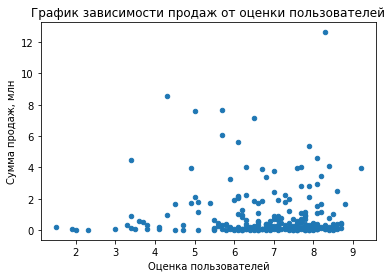

In [46]:
actually_period.query('platform == "PS4"').plot.scatter(x='user_score', y='sum_sales')
plt.title('График зависимости продаж от оценки пользователей')
plt.ylabel('Сумма продаж, млн')
plt.xlabel('Оценка пользователей')
plt.show;

На графике зависимости оценки пользователей и суммарное количество продаж видно, что в основном пользователи ставили оценки от 5,5 и немного не доходя до 9. Просвечивается но совсем маленькая зависимость оценки и количество продаж.

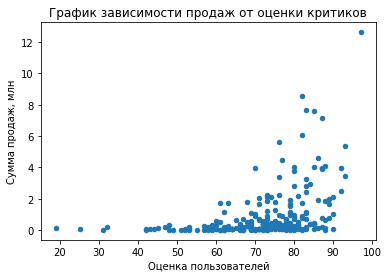

In [47]:
actually_period.query('platform == "PS4"').plot.scatter(x='critic_score', y='sum_sales')
plt.title('График зависимости продаж от оценки критиков')
plt.ylabel('Сумма продаж, млн')
plt.xlabel('Оценка пользователей')
plt.show;

На этом графике зависимость от количество продаж и оценки просматривается лучше и виден подъем, чем больше оценка, тем больше продаж у игры.

### Зависимость отзывов критиков и продаж для платформ из актуального периода

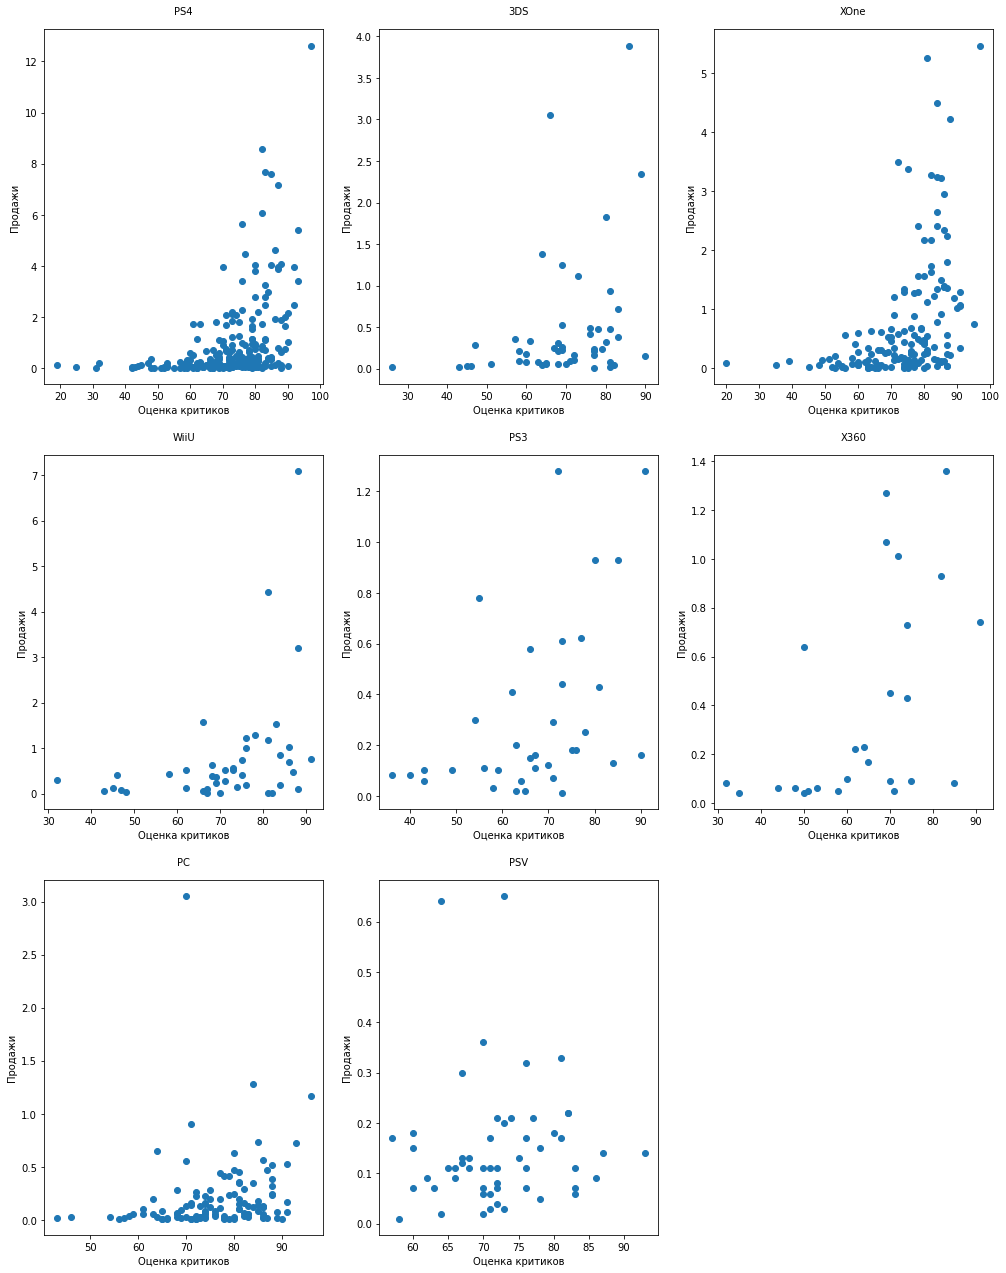

In [48]:
a = 4
b = 3
c = 1
platforms = ['PS4', '3DS', 'XOne', 'WiiU', 'PS3', 'X360', 'PC', 'PSV']
plt.figure(figsize=(17, 30))
for i in platforms:
    plt.subplot(a,b,c)
    act_period_group = actually_period[actually_period['platform'] == i]
    plt.scatter(act_period_group['critic_score'], act_period_group['sum_sales'])
    plt.title(str(i), fontsize=10, loc='center',pad=15)
    c+=1
    plt.ylabel('Продажи', fontsize=10)
    plt.xlabel('Оценка критиков', fontsize=10)
plt.show;

Из полученных графиков мы можем увидеть, что сильная зависимость прослеживается на платформах: 'PS4', 'XOne'.\
Также прослеживается не такая явная, но зависимость на платформе 'PC'.\
На остальных платформах зависимости не так явно выражена.\
Видно, что чем выше оценка критика, тем больше продаж.

In [96]:
print('Корреляция оценки пользователей и количество продаж')
for i in platforms:
    print(i.ljust(10) , round(actually_period[actually_period['platform'] == i]['sum_sales'].corr(df['critic_score']),3))

Корреляция оценки пользователей и количество продаж
PS4        0.403
3DS        0.314
XOne       0.429
WiiU       0.37
PS3        0.447
X360       0.526
PC         0.175
PSV        0.043


В цифрах мы видим везде достаточно хорошую зависимость, кроме PС и PSV.\
На платформе PC немного больше корреляция чем PSV, но все равно они чрезмерно маленькие.

### Зависимость отзывов пользователей и продаж для платформ из актуального периода

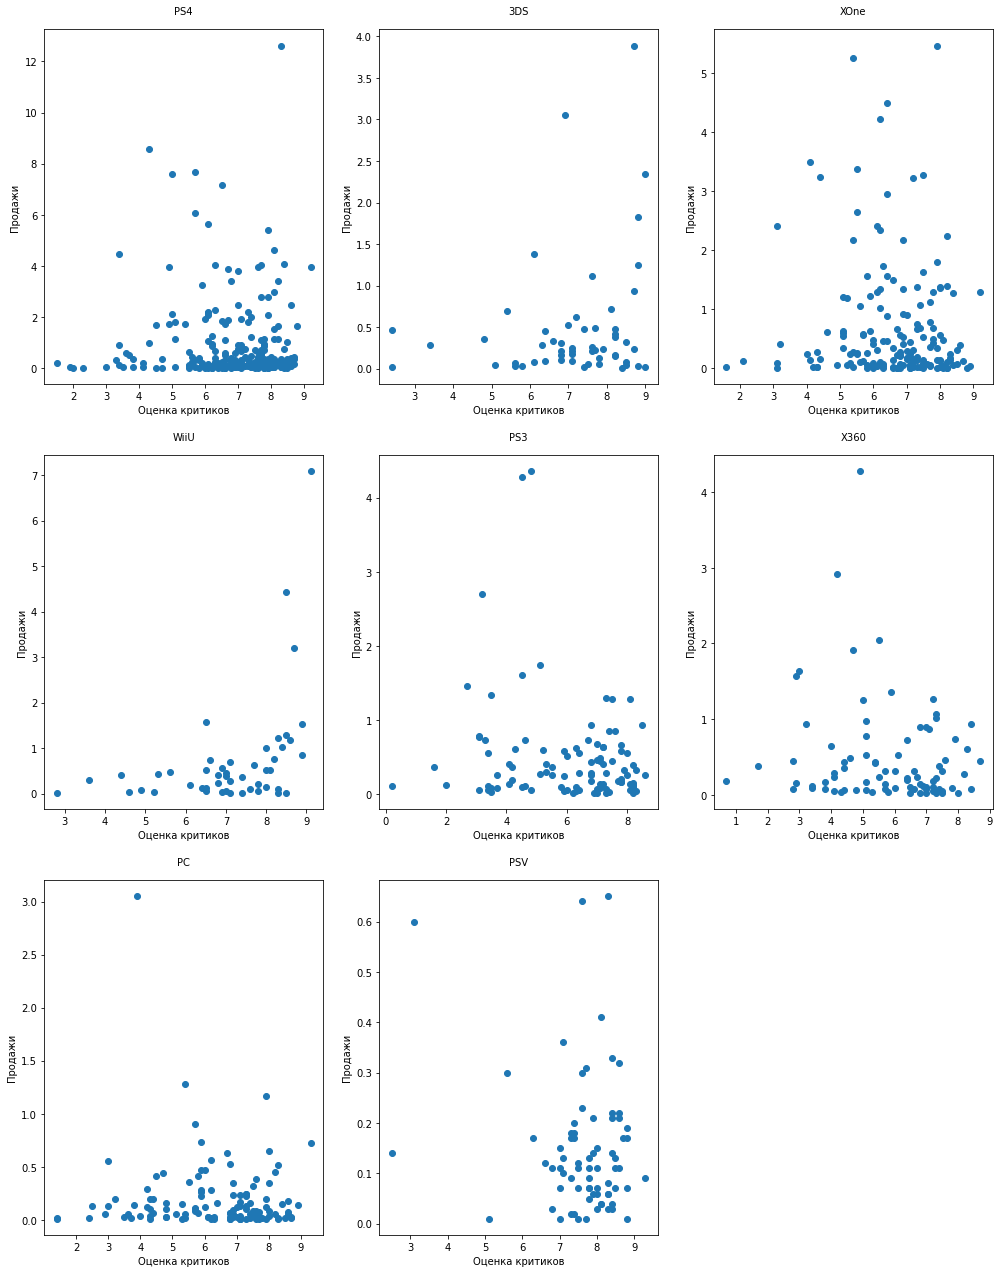

In [50]:
a = 4
b = 3
c = 1
platforms = ['PS4', '3DS', 'XOne', 'WiiU', 'PS3', 'X360', 'PC', 'PSV']
plt.figure(figsize=(17, 30))
for i in platforms:
    plt.subplot(a,b,c)
    act_period_group = actually_period[actually_period['platform'] == i]
    plt.scatter(act_period_group['user_score'], act_period_group['sum_sales'])
    plt.title(str(i), fontsize=10, loc='center',pad=15)
    c+=1
    plt.ylabel('Продажи', fontsize=10)
    plt.xlabel('Оценка критиков', fontsize=10)
plt.show;

На графиках почти нигде нету зависимости количество продаж от оценки пользователей.\
Что-то похожее есть на платформе WiiU, на этой платформе не сильно, но влияют отзывы пользователей.

In [51]:
print('Корреляция оценки пользователей и количество продаж')
for i in platforms:
    print(i, actually_period[actually_period['platform'] == i]['sum_sales'].corr(df['user_score']))

Корреляция оценки пользователей и количество продаж
PS4 -0.040131589472697335
3DS 0.21519327185270287
XOne -0.07038392806475818
WiiU 0.40792645792170784
PS3 -0.16676141347662107
X360 -0.13844457094566504
PC -0.07159665703472456
PSV -0.16845504978064443


Да, просматривается зависимость только у платформы WiiU, как было видно на графиках.\
На других платформах отзывы вообще не влияют.

### Распределение игр по жанрам

Чтобы нам понять, какие жанры имеют стабильный доход, построим диаграммы размаха.

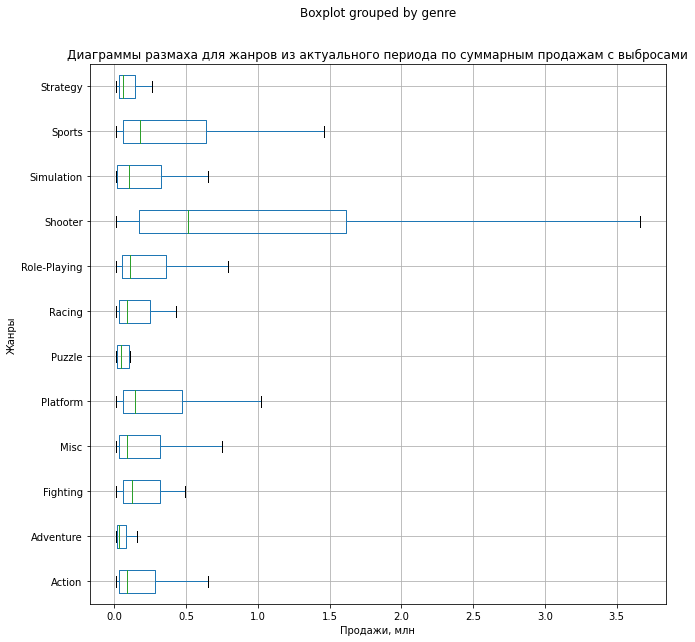

In [52]:
actually_period.boxplot(by='genre', column='sum_sales', vert=False, figsize=(10,10), showfliers=False)
plt.title('Диаграммы размаха для жанров из актуального периода по суммарным продажам с выбросами')
plt.xlabel('Продажи, млн')
plt.ylabel('Жанры')
plt.show;

In [53]:
(actually_period.pivot_table(index='genre', values='sum_sales', aggfunc='median')
 .sort_values(by='sum_sales', ascending=False)
)

,sum_sales
genre,
Shooter,0.515
Sports,0.180
Platform,0.140
Fighting,0.125
Role-Playing,0.110
Simulation,0.100
Action,0.090
Misc,0.090
Racing,0.090


На первом месте по медианным продажам находится жанр: Shooter. Его медиана равна примерно 0.5 млн продаж.\
С большим отрывом за ним идут жанры: Sports и Platform. Они имеют примерно 0.14-0.18 млн медианных продаж.\
Меньше всего медианных продаж у жанров: Adventure, Puzzle, Strategy.

Если рассматривать жанр, в который стоит вложить бюджет, это будет Shooter.

### Вывод по исследовательскому анализу

В этом разделе мы проделали много работы:
* Мы нашли зависимость количество игр от года. Больше всего выпускалось игр с 2001 по 2011 год.
* Нашли у кого было больше всего продаж за все время. Видно, что больше всего продаж было на платформах: PS2, X360, Wii, PS3, DS, PS. Построили графики зависимости выпускаемых игр в год для этих платформ. Узнали, что в среднем 11 лет живет платформа.
* Нашли актуальный период, который помог нам для дальнейшего исследования
* Нашли из актуального периода, какие платформы лидируют. В топ 3 платформы по продажам входит: PS4, XOne, 3DS. Все остальные платформы находятся примерно на одинаковом уровне.
* Построили ящик с усами для платформ из актуального периода и для всех остальных платформ.
* Посмотрели насколько влиют отзывы на продажи внутри одной платформы, взяли PS4, так как у нее больше всего продаж. Посчитали корелляцию и построили зависимость для оценки пользователей и для оценки критиков к продажам.
* Нашли зависимость отзывов критиков к продажам для платформ из актуального периода. Отзывы критиков влияют на продажи, чем выше оценка, тем больше продаж.
* Нашли зависимость отзывов пользователей к продажам для платформ из актуального периода. Отзывы пользователей почти не влияют на продажи.
* Построили диаграмму размаха жанров по продажам. Больше всего медианных продаж имеет жанр: Shooter.

## Построим портреты пользователей каждого региона

### Платформы и продажи на разных рынках

**График платформ на рынке Северной Америки**

In [54]:
platform_na = (actually_period.pivot_table(index='platform', values='na_sales', aggfunc='sum')
               .sort_values(by='na_sales', ascending=False)
              .reset_index())
platform_na.head()

,platform,na_sales
0,PS4,98.61
1,XOne,81.27
2,X360,28.30
3,3DS,22.64
4,PS3,22.05


Объедим в категорию "Other", те платформы, которые не вошли в топ-5 платформ.

In [55]:
platform_na['platform'] = (platform_na['platform']
        .where(platform_na['platform']
        .isin(['PS4', 'XOne', 'X360' , '3DS', 'PS3']), other='Other'))

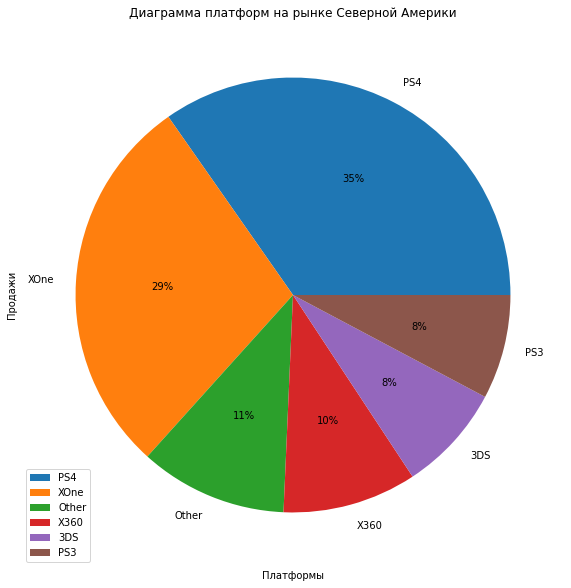

In [56]:
(platform_na
     .pivot_table(index='platform', values='na_sales', aggfunc='sum')
     .sort_values(by='na_sales', ascending=False)
     .plot(kind='pie',
       figsize = (10,10),
       subplots=True,
       autopct='%1.0f%%'))
plt.title('Диаграмма платформ на рынке Северной Америки')
plt.ylabel('Продажи')
plt.xlabel('Платформы')
plt.show;

На диаграмме мы можем увидеть платформы из актуального периода в Северной Америки.\
В топ-5 платформ входит:
* PS4 занимает 1 место по продажам в Северной америки. У этой платформы продаж почти на 98-99 млн.
* XOne занимает 2 место по продажам, 81 млн продаж, примерно на 27-28 млн продаж меньше, чем у PS4, но все же, эти две платформы обгоняют другие платформы в несколько раз.
* X360 занимает 3 место. Сильно отстает от предыдущих платформ. Почти 28 млн продаж за актуальный период.
* 3DS занимает 4 место. Примерно продаж на 22-23 млн.
* PS3 занимает 5 место. Продаж 22 млн. Не сильно уступает 3DS.
* Также можем увидеть на диаграмме категорию Other, в которую входит 11% остальных платформ, которые не вошли в топ-5.

Можно сделать вывод, что если вкладывать инвестиции, то лучше всего рассмотреть две платформы: PS4, XOne.

**График платформ на рынке Европы**

In [57]:
platform_eu = (actually_period.pivot_table(index='platform', values='eu_sales', aggfunc='sum')
               .sort_values(by='eu_sales', ascending=False)
              .reset_index())
platform_eu.head()

,platform,eu_sales
0,PS4,130.04
1,XOne,46.25
2,PS3,25.54
3,PC,17.97
4,3DS,16.12


Также добавим категорию "Other".

In [58]:
platform_eu['platform'] = (platform_eu['platform']
                           .where(platform_eu['platform']
                           .isin(['PS4', 'XOne', 'PC' , '3DS', 'PS3']), other='Other'))

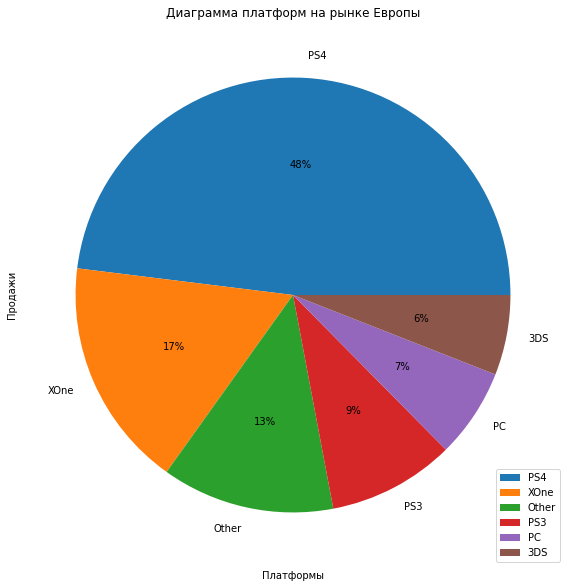

In [59]:
(platform_eu.pivot_table(index='platform', values='eu_sales', aggfunc='sum')
 .sort_values(by='eu_sales', ascending=False)
 .plot(kind='pie',
       figsize = (10,10),
       subplots=True,
       autopct='%1.0f%%'))
plt.title('Диаграмма платформ на рынке Европы')
plt.ylabel('Продажи')
plt.xlabel('Платформы')
plt.show;

Посмотрим на диаграмму платформ в Европе и сделаем выводы.
1. В списке номер один это PS4. Он занимает лидирующее место и обгоняет другие платформы почти в несколько раз. Имеет долю 48% продаж от рынка.
2. XOne занимает второе место по продажам. Имеет 17% продаж за актуальный период. Сильно отстает от PS4 относительно Американского рынка.
3. PS3 занимает третье место и имеет примерно 9% продаж. Относительно Американского рынка, где занимает 5 место, здесь она вошла в топ-3.
4. PC занимает четвертое место, имеет 7% продаж. Вошла в топ-5 в Европе, при этом в Америке занимает 7 место.
5. 3DS не сильно уступает PC имеет примерно 6% продаж за актуальный период.\
Если рассматривать, какая платформа актуальнее всего и куда лучше вложить деньги, то это будет PS4.

**График платформ на рынке Японии**

In [60]:
platform_jp = (actually_period.pivot_table(index='platform', values='jp_sales', aggfunc='sum')
               .sort_values(by='jp_sales', ascending=False)
              .reset_index())
platform_jp.head()

,platform,jp_sales
0,3DS,44.24
1,PS4,15.02
2,PSV,14.54
3,PS3,11.22
4,WiiU,7.31


In [61]:
platform_jp['platform'] = (platform_jp['platform']
                           .where(platform_jp['platform']
                           .isin(['PS4', 'PSV', 'WiiU' , '3DS', 'PS3']), other='Other'))

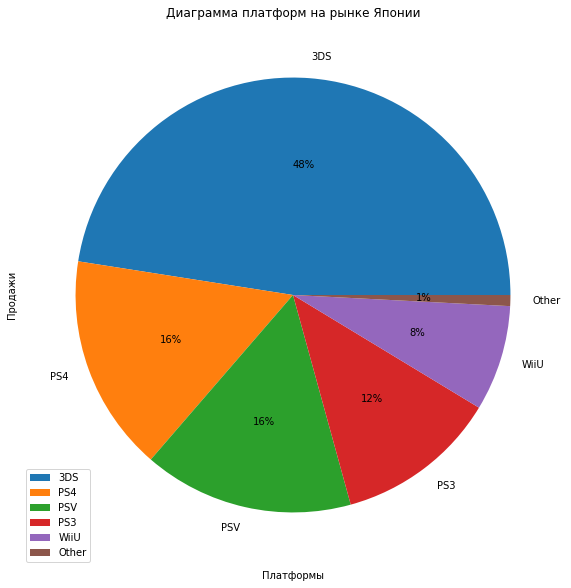

In [62]:
(platform_jp.pivot_table(index='platform', values='jp_sales', aggfunc='sum')
 .sort_values(by='jp_sales', ascending=False)
 .plot(kind='pie',
       figsize = (10,10),
       subplots=True,
       autopct='%1.0f%%'))
plt.title('Диаграмма платформ на рынке Японии')
plt.ylabel('Продажи')
plt.xlabel('Платформы')
plt.show;

Посмотрим на диаграмму платформ на рынке Японии.
1. Первое место заняла платформа 3DS, Японский рынок отличился от предыдущий рынков. Имеет примерно 48% продаж. И имеет отрыв от других платформ в несколько раз.
2. Второе-третье место заняла платформа PS4. Имеет примерно 16% продаж.
3. Третье-второе место занимает PSV имеет столько же,сколько и платформа PS4. Примерно 16% продаж.
4. Четвертое место занимает PS3. Она имеет примерно 12% продаж. 
5. Пятое место занимает платформа WiiU. Имеет примерно 8% продаж.\
Можно сделать выводы, что японцы любят 3DS и платформы PS, сразу три платформы в топ-5, если вкладывать деньги в платформы Японии, лучше всего рассмотреть 3DS или PS платформы.

### Графики жанров на разных рынках

**Топ жанров Северной Америки**

In [63]:
genre_na = (actually_period.pivot_table(index='genre', values='na_sales', aggfunc='sum')
               .sort_values(by='na_sales', ascending=False)
              .reset_index())
genre_na.head()

,genre,na_sales
0,Shooter,79.02
1,Action,72.53
2,Sports,46.13
3,Role-Playing,33.47
4,Misc,15.05


In [64]:
genre_na['genre'] = (genre_na['genre']
                           .where(genre_na['genre']
                           .isin(['Shooter', 'Action', 'Sports' , 'Role-Playing', 'Misc']), other='Other'))

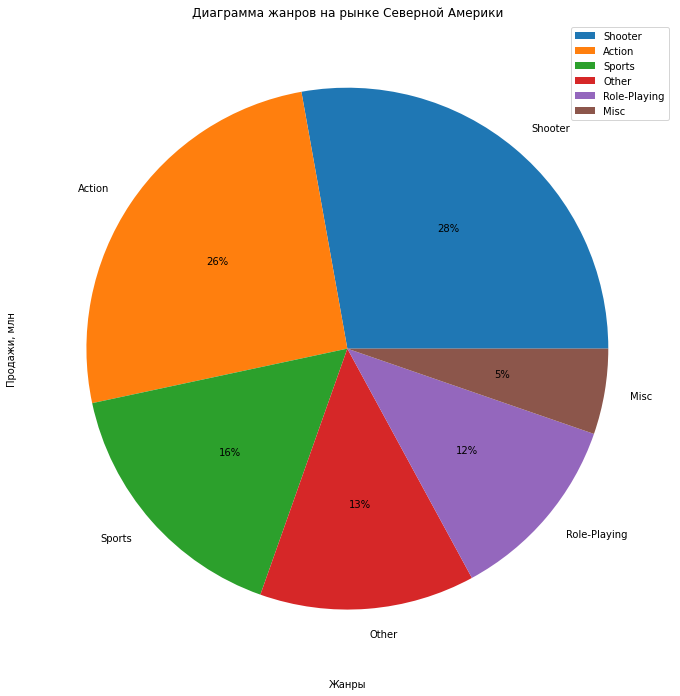

In [65]:
(genre_na
     .pivot_table(index='genre', values='na_sales', aggfunc='sum')
     .sort_values(by='na_sales', ascending=False)
     .plot(kind='pie',
       figsize = (12,12),
       subplots=True,
       autopct='%1.0f%%'))
plt.title('Диаграмма жанров на рынке Северной Америки')
plt.ylabel('Продажи, млн')
plt.xlabel('Жанры')
plt.show;

На рынке Северной Америки можно увидеть такой топ-5 жарнов:
1. Shooter - 28% продаж
2. Action - 26% продаж
3. Sports - 16% продаж
4. Role-Playing - 12% продаж
5. Misc - 5% продаж

На рынке Америки видно, что самые популярные жанры это Shooter и Action. Они сильно превосходят остальные жанры. Если вкладывать инвестиции, то эти жанры лучше рассмотреть впервую очередь.

**Топ жанров Европы**

In [66]:
genre_eu = (actually_period.pivot_table(index='genre', values='eu_sales', aggfunc='sum')
               .sort_values(by='eu_sales', ascending=False)
              .reset_index())
genre_eu.head()

,genre,eu_sales
0,Action,74.68
1,Shooter,65.52
2,Sports,45.73
3,Role-Playing,28.17
4,Racing,14.13


In [67]:
genre_eu['genre'] = (genre_eu['genre']
                           .where(genre_eu['genre']
                           .isin(['Shooter', 'Action', 'Sports' , 'Role-Playing', 'Racing']), other='Other'))

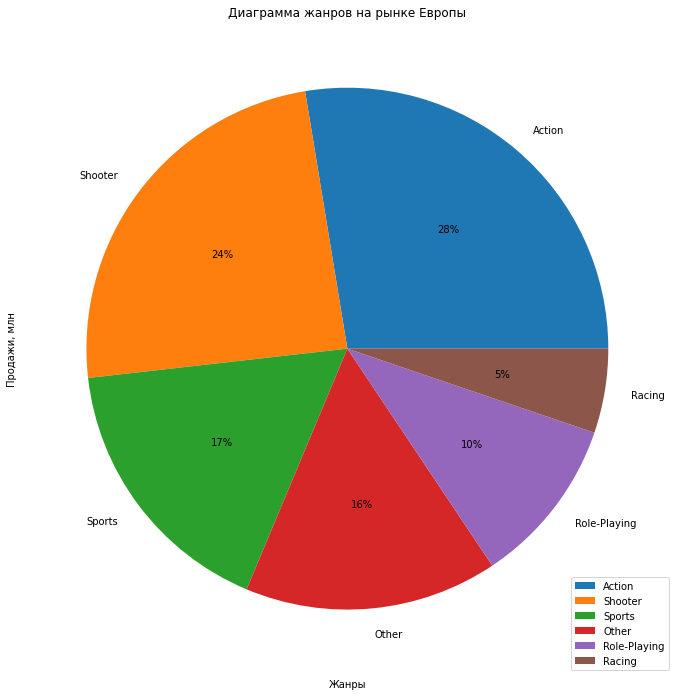

In [68]:
(genre_eu
     .pivot_table(index='genre', values='eu_sales', aggfunc='sum')
     .sort_values(by='eu_sales', ascending=False)
     .plot(kind='pie',
       figsize = (12,12),
       subplots=True,
       autopct='%1.0f%%'))
plt.title('Диаграмма жанров на рынке Европы')
plt.ylabel('Продажи, млн')
plt.xlabel('Жанры')
plt.show;

Посмотрим на топ жанров на графике из актуального периода в Европе.
1. Action - 28% продаж
2. Shooter - 24% продаж
3. Sports - 17% продаж
4. Role-Playing - 10% продаж
5. Racing - 5% продаж

На рынке Европы тоже можно заметить, что самы популярные жанры это: Action и Shooter. Если посмотреть на рынки Америки и Европы, то на рынок Европы в топ-5 попал жанр Racing, а в Америки пятое место занял Misc.\
Актуальнее всего рассмотреть жанры Action, Shooter. Лучше воздержаться от вложения денег в Racing, меньше всего продаж из топ-5 актуального периода.

**Топ жанров Японии**

In [69]:
genre_jp = (actually_period.pivot_table(index='genre', values='jp_sales', aggfunc='sum')
               .sort_values(by='jp_sales', ascending=False)
              .reset_index())
genre_jp.head()

,genre,jp_sales
0,Role-Playing,31.16
1,Action,29.58
2,Fighting,6.37
3,Misc,5.61
4,Shooter,4.87


In [70]:
genre_jp['genre'] = (genre_jp['genre']
                           .where(genre_jp['genre']
                           .isin(['Shooter', 'Action', 'Fighting' , 'Role-Playing', 'Misc']), other='Other'))

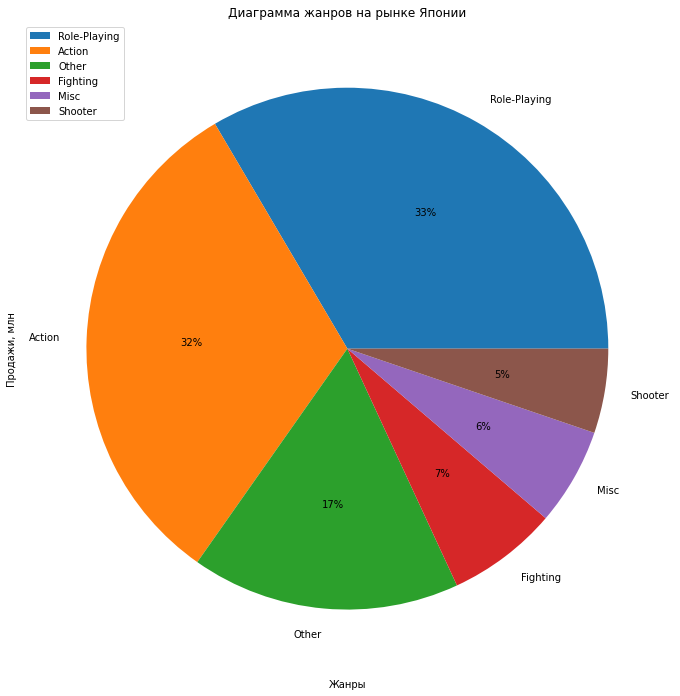

In [71]:
(genre_jp
     .pivot_table(index='genre', values='jp_sales', aggfunc='sum')
     .sort_values(by='jp_sales', ascending=False)
     .plot(kind='pie',
       figsize = (12,12),
       subplots=True,
       autopct='%1.0f%%'))
plt.title('Диаграмма жанров на рынке Японии')
plt.ylabel('Продажи, млн')
plt.xlabel('Жанры')
plt.show;

Посмотрим на диаграмму жанров Японии.
1. Role-Playing - 33% продаж
2. Action - 32% продаж
3. Fighting	 - 7% продаж
4. Misc - 6% продаж
5. Shooter - 5% продаж

Если посмотреть топ-5 жанров на рынке Японии, то можно увидеть сильную разницу относительно рынков Европы и Америки.\
Самыми продаваемыми жанрами стали: Role-Playing, Action. Эти два жанрав сильно превосходят остальные жанры из топ-5. 

### Влияние ESRB на продажи в регионах

Чтобы построить графики, нам нужно добавить еще один столбец с пояснением возраста, что означает каждая категория в колонке rating

In [72]:
def categorize_rating(row):
    if row == 'E':
        return '0'
    elif row == 'M':
        return '17+'
    elif row == 'T':
        return '13+'
    elif row == 'E10+':
        return '10+'
    else:
        return 'Unknown'

In [73]:
actually_period['ESRB_old'] = actually_period['rating'].apply(categorize_rating)
# Отключим предупреждение
import warnings
warnings.filterwarnings('ignore')

/var/folders/0f/y25njtnx6ss4xp4jv70vj2nc0000gn/T/ipykernel_12258/3880885148.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  actually_period['ESRB_old'] = actually_period['rating'].apply(categorize_rating)


**Диаграмма ESRB на рынке Северной Америки**

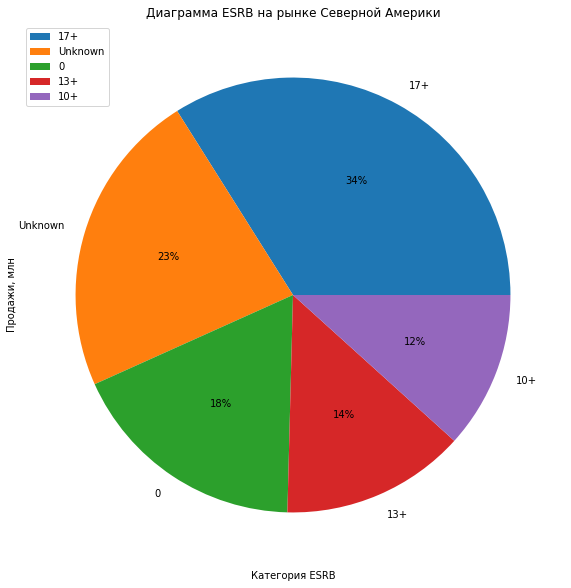

In [74]:
(actually_period.pivot_table(index='ESRB_old', values='na_sales', aggfunc='sum')
     .sort_values(by='na_sales',ascending = False)
     .plot(kind='pie',
       figsize = (10,10),
       subplots=True,
       autopct='%1.0f%%'))
plt.title('Диаграмма ESRB на рынке Северной Америки')
plt.ylabel('Продажи, млн')
plt.xlabel('Категория ESRB')
plt.show;

На рынке Северной Америки больше всего продаж для лиц 17+, следом идет категория без исследования на возраст.\
Третье место по продажа занимает для всех возрастов.\
Четвертое место 13+.\
Пятое место 10+.\
Категория 17+ самая популярная на рынке Северной Америки из актуального периода. Если инвестировать деньги, то игра нужна из этой категории.

**Диаграмма ESRB на рынке Европы**

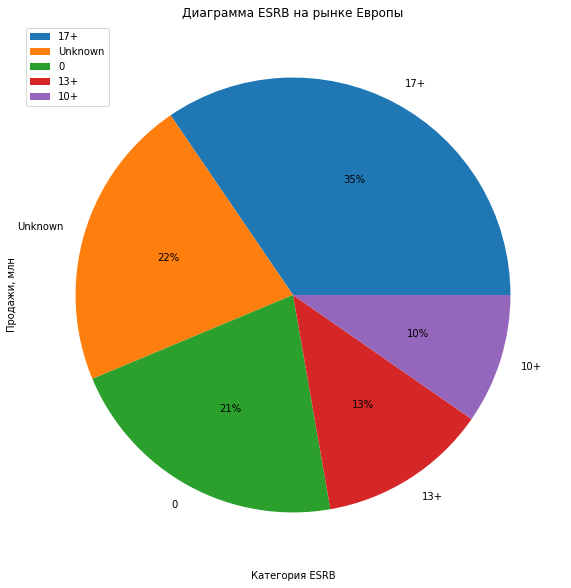

In [75]:
(actually_period.pivot_table(index='ESRB_old', values='eu_sales', aggfunc='sum')
 .sort_values(by='eu_sales',ascending = False)
 .plot(kind='pie',
       figsize = (10,10),
       subplots=True,
       autopct='%1.0f%%'))
plt.title('Диаграмма ESRB на рынке Европы')
plt.ylabel('Продажи, млн')
plt.xlabel('Категория ESRB')
plt.show;

На рынке Европы все примерно похоже, как и на Американском рынке, также первое место занимает категория 17+.

**Диаграмма ESRB на рынке Японии**

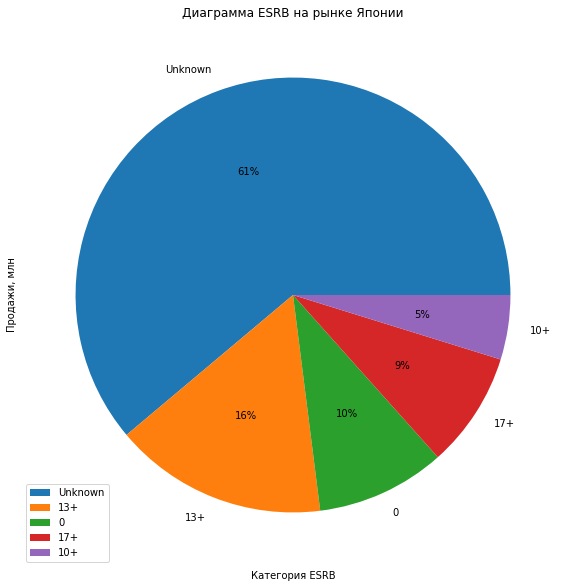

In [76]:
(actually_period.pivot_table(index='ESRB_old', values='jp_sales', aggfunc='sum')
 .sort_values(by='jp_sales',ascending = False)
 .plot(kind='pie',
       figsize = (10,10),
       subplots=True,
       autopct='%1.0f%%'))
plt.title('Диаграмма ESRB на рынке Японии')
plt.ylabel('Продажи, млн')
plt.xlabel('Категория ESRB')
plt.show;

Японский рынок снова отличился, первое место заняла категория без определения возраста.\
А на втором месте оказалась категория 13+ лет.\
Третье место категория для всех возрастов.\
Четвертое место категория 17+ лет. Относительно рынков Америки и Европы, тут она оказалась на 4 месте.\
Пятое место категория 10+ лет.

Так как система ESRB предназначена для маркировки игр для США и Канады, справедливо увидеть, что первое место занимает категория без определения возраста.

Японский рынок сильно отличается от двух других рынков. На этом рынке лучше всего вкладывать инвестиции в категорию 13+

**Вывод**

Мы построили портреты пользователей для каждого региона.
* В Северной Америки в топ-5 платформ входит: PS4, XOne, X360, 3DS, PS3
* В Европе в топ-5 платформ входит: PS4, XOne, PS3, PC, 3DS
* В Японии в топ-5 платформ входит: 3DS, PS4, PSV, PS3, WiiU\
Рынок Японии по платформам сильно отличается от рынка Северной Америки и Европы

Также мы построили графики жанров для разных регионов.
* В Северной Америки в топ-5 жанров входит: Shooter, Action, Sports, Role-Playing, Misc
* В Европе в топ-5 жанров входит: Action, Shooter, Sports, Role-Playing, Racing
* В Японии в топ-5 жанров входит: Role-Playing, Action, Fighting, Misc, Shoote\
Можем заметить, что рынок Америки и Европы примерно похожи, а рынок Японии сильно выбивается из этого топа.

Далее мы построили графики с влиянием ESRB на продажи в каждом регионе и получили такие данные:
* В Севернйо Америки такая последовательность по убыванию продаж игр для разных категорий: 17+, Unknown, 0, 13+, 10+.
* В Европе такая последовательность по убыванию продаж игр для разных категорий: 17+, Unknown, 0, 13+, 10+
* В Японии такая последовательность по убыванию продаж игр для разных категорий: Unknown, 13+, 0, 17+, 10+\
В Северной Америки и Европе количество продаж и категории совпадает, а Япония отличается.

## Проверим гипотезы

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Чтобы это понять, нам нужно составить две гипотезы: нулевую и альтернативную, запишем:
* Нулевая гипотеза: средние пользовательские рейтинги платформ Xbox One и PC одинаковые
* Альтернативная гипотеза: средние пользовательские рейтинги платформ Xbox One и PC разные

Применим специальный метод ttest_ind для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам. Выборки разные, поэтому используем именно его.\
Также поменяем параметр equal_var на False, так как нам неизвестно, одинковые ли совокупности или нет.

In [77]:
XOne_user_score = actually_period.query('platform == "XOne"')['user_score']
PC_user_score = actually_period.query('platform == "PC"')['user_score']

alpha = 0.05

results = st.ttest_ind(XOne_user_score, PC_user_score, equal_var = False, nan_policy='omit')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.11601398086668985
Не получилось отвергнуть нулевую гипотезу


Сделаем проверку, найдем среднее оценок пользователей для двух платформ:

In [78]:
print('Среднее значение оценок пользователей для платформы XOne:')
actually_period.query('platform == "XOne"')['user_score'].mean()

Среднее значение оценок пользователей для платформы XOne:


6.594545454545453

In [79]:
print('Среднее значение оценок пользователей для платформы PC:')
actually_period.query('platform == "PC"')['user_score'].mean()

Среднее значение оценок пользователей для платформы PC:


6.298360655737703

Из проверки можно сделать вывод, что среднее значение оценок пользователей примерно одинаковы на двух платформах.

**Вывод**

Из проверенной гипотезы, что оценки пользователей на платформе XOne и PC ранвы, можно сделать вывод, что мы ее не отвергаем.

Из проверенной гипотезы, можно сделать вывод, что мы ее не отвергаем.

### Средние пользовательские рейтинги жанров Action и Sports разные

Чтобы это понять, нам нужно составить две гипотезы: нулевую и альтернативную, запишем:
* Нулевая гипотеза: средние пользовательские рейтинги жанров Action и Sports одинаковые
* Альтернативная гипотеза: средние пользовательские рейтинги жанров Action и Sports разные

Также воспользуемся методом ttest_ind, потому что совокупности берутся из разных мест.\
Поменяем также параметр equal_var так как совокупности разные.

In [99]:
Action_user_score = actually_period.query('genre == "Action"')['user_score']
Sports_user_score = actually_period.query('genre == "Sports"')['user_score']

alpha = 0.05

results = st.ttest_ind(Action_user_score, Sports_user_score, equal_var = False, nan_policy='omit')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 1.1825550382644845e-14
Отвергаем нулевую гипотезу


Сделаем проверку, найдем среднее оценок пользователей для двух платформ:

In [81]:
print('Среднее значение оценок пользователей для жанра Action')
actually_period.query('genre == "Action"')['user_score'].mean()

Среднее значение оценок пользователей для жанра Action


6.760606060606054

In [82]:
print('Среднее значение оценок пользователей для жанра Sports')
actually_period.query('genre == "Sports"')['user_score'].mean()

Среднее значение оценок пользователей для жанра Sports


5.225196850393697

Из проверки видно, что срденее значение оценок разное. Это еще раз подтверждает гипотезу, что они разные.

Из полученных данных видно, что мы отвергли нулевую гипотезу у жанров Action и Sports, так как пользовательские оценки разные.

### Вывод

Из проверки двух гипотез, можно сделать такие выводы:
* Гипотеза о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые, не была отвергнута.
* Гипотеза о то, что средние пользовательские рейтинги жанров Action и Sports одинаковые, была отвергнута.

## Общий вывод

**В этом исследовании мы проделали огромную работу, мы сделали:**

**Предобработку данных:**
* Заменили названия столбцов, где это нужно было
* Заменили типы данных, где могли
* Проверили дубликаты
* Объяснили почему не можем оставить пропуски, а где-то убрали их
* Добавили новый столбец

**Провели исследовательский анализ:**
* Мы нашли зависимость количество игр от года. Больше всего выпускалось игр с 2001 по 2011 год.
* Нашли у кого было больше всего продаж за все время. Видно, что больше всего продаж было на платформах: PS2, X360, Wii, PS3, DS, PS. Построили графики зависимости выпускаемых игр в год для этих платформ. Узнали, что в среднем 11 лет живет платформа.
* Нашли актуальный период, который помог нам для дальнейшего исследования
* Нашли из актуального периода, какие платформы лидируют. В топ 3 платформы по продажам входит: PS4, XOne, 3DS. Все остальные платформы находятся примерно на одинаковом уровне.
* Построили ящик с усами для платформ из актуального периода и для всех остальных платформ.
* Посмотрели насколько влиют отзывы на продажи внутри одной платформы, взяли PS4, так как у нее больше всего продаж. Посчитали корелляцию и построили зависимость для оценки пользователей и для оценки критиков к продажам.
* Нашли зависимость отзывов критиков к продажам для платформ из актуального периода. Отзывы критиков влияют на продажи, чем выше оценка, тем больше продаж.
* Нашли зависимость отзывов пользователей к продажам для платформ из актуального периода. Отзывы пользователей почти не влияют на продажи.
* Построили распределение жанров по продажам. Чаще всего встречаются: Action, Role-Playing, Adventure на платформах из актуального периода.

**Мы построили портреты пользователей для каждого региона.**
* В Северной Америки в топ-5 платформ входит: PS4, XOne, X360, 3DS, PS3
* В Европе в топ-5 платформ входит: PS4, XOne, PS3, PC, 3DS
* В Японии в топ-5 платформ входит: 3DS, PS4, PSV, PS3, WiiU\
Рынок Японии по платформам сильно отличается от рынка Северной Америки и Европы

**Также мы построили графики жанров для разных регионов.**
* В Северной Америки в топ-5 жанров входит: Shooter, Action, Sports, Role-Playing, Misc
* В Европе в топ-5 жанров входит: Action, Shooter, Sports, Role-Playing, Racing
* В Японии в топ-5 жанров входит: Role-Playing, Action, Fighting, Misc, Shoote\
Можем заметить, что рынок Америки и Европы примерно похожи, а рынок Японии сильно выбивается из этого топа.

**Далее мы построили графики с влиянием ESRB на продажи в каждом регионе и получили такие данные:**
* В Севернйо Америки такая последовательность по убыванию продаж игр для разных категорий: 17+, Unknown, 0, 13+, 10+.
* В Европе такая последовательность по убыванию продаж игр для разных категорий: 17+, Unknown, 0, 13+, 10+
* В Японии такая последовательность по убыванию продаж игр для разных категорий: Unknown, 13+, 0, 17+, 10+\
В Северной Америки и Европе количество продаж и категории совпадает, а Япония отличается.

**Из полуенных портретов можно составить такие выводы**
* Если инвестировать деньги в Северной Америки, то выгоднее всего сделать это в игру которая находится на платформе PS4 из жанра Shooter, и имеет возрастное ограничение 17+
* Если инвестировать деньги в Европе, то выгоднее всего сделать это в игру которая находится на платформе PS4 из жанра Action, и имеет возрастное ограничение 17+
* Если инвестировать деньги в Японии, то выгоднее всего сделать это в игру которая находится на платформе 3DS из жанра Role-Playing, и либо не имеет возрастного ограничение(еще не определено), либо 13+ лет

**Проверили две гипотезы, и получили такие выводы:**
* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
* Средние пользовательские рейтинги жанров Action и Sports разные

**Куда лучше вложить рекламный бюджет**

Лучше всего бюджет вкладывать:
* В Северной Америки или Европе: 
    * Платформа: PS4
    * Жанр должен быть Shooter(так как он находится в топе по платформам для этих регионов и медиана продаж больше других).
    * ESRB должна быть 17+
    * Обязательно должны быть положительные отзывы критиков
    Это должно помочь максимально прогнозировать окупаемость рекламы и прибыли
* В Японии:
    * Платформа должна быть 3DS
    * Жанр: Role-Playing или Action
    * ESRB не сильно влияет на продажу в данном регионе
    * Должны быть положительные отзывы критиков
    Так как рынок Японии отличается, то и требования другие, эти рекомендации должны помочь для окупаемости рекламы и прибыли